In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [14]:
df = pd.read_csv("D:\mainflow\heart.csv")

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
# Display basic dataframe info
print(df.head())
print(df.columns)
print(df.dtypes)
df.info()
print(df.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca

<Axes: >

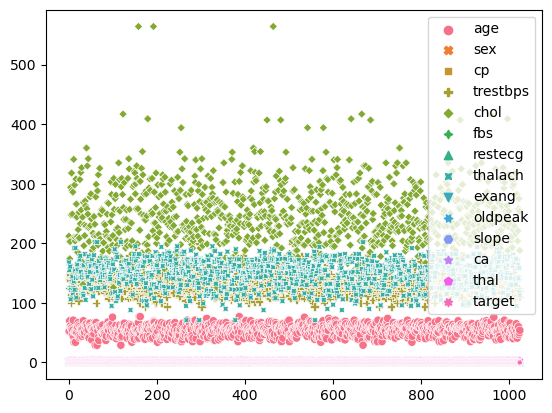

In [18]:
# Scatterplot of dataframe
sns.scatterplot(df)

In [19]:
# Features to plot
features = df.columns.drop('target')

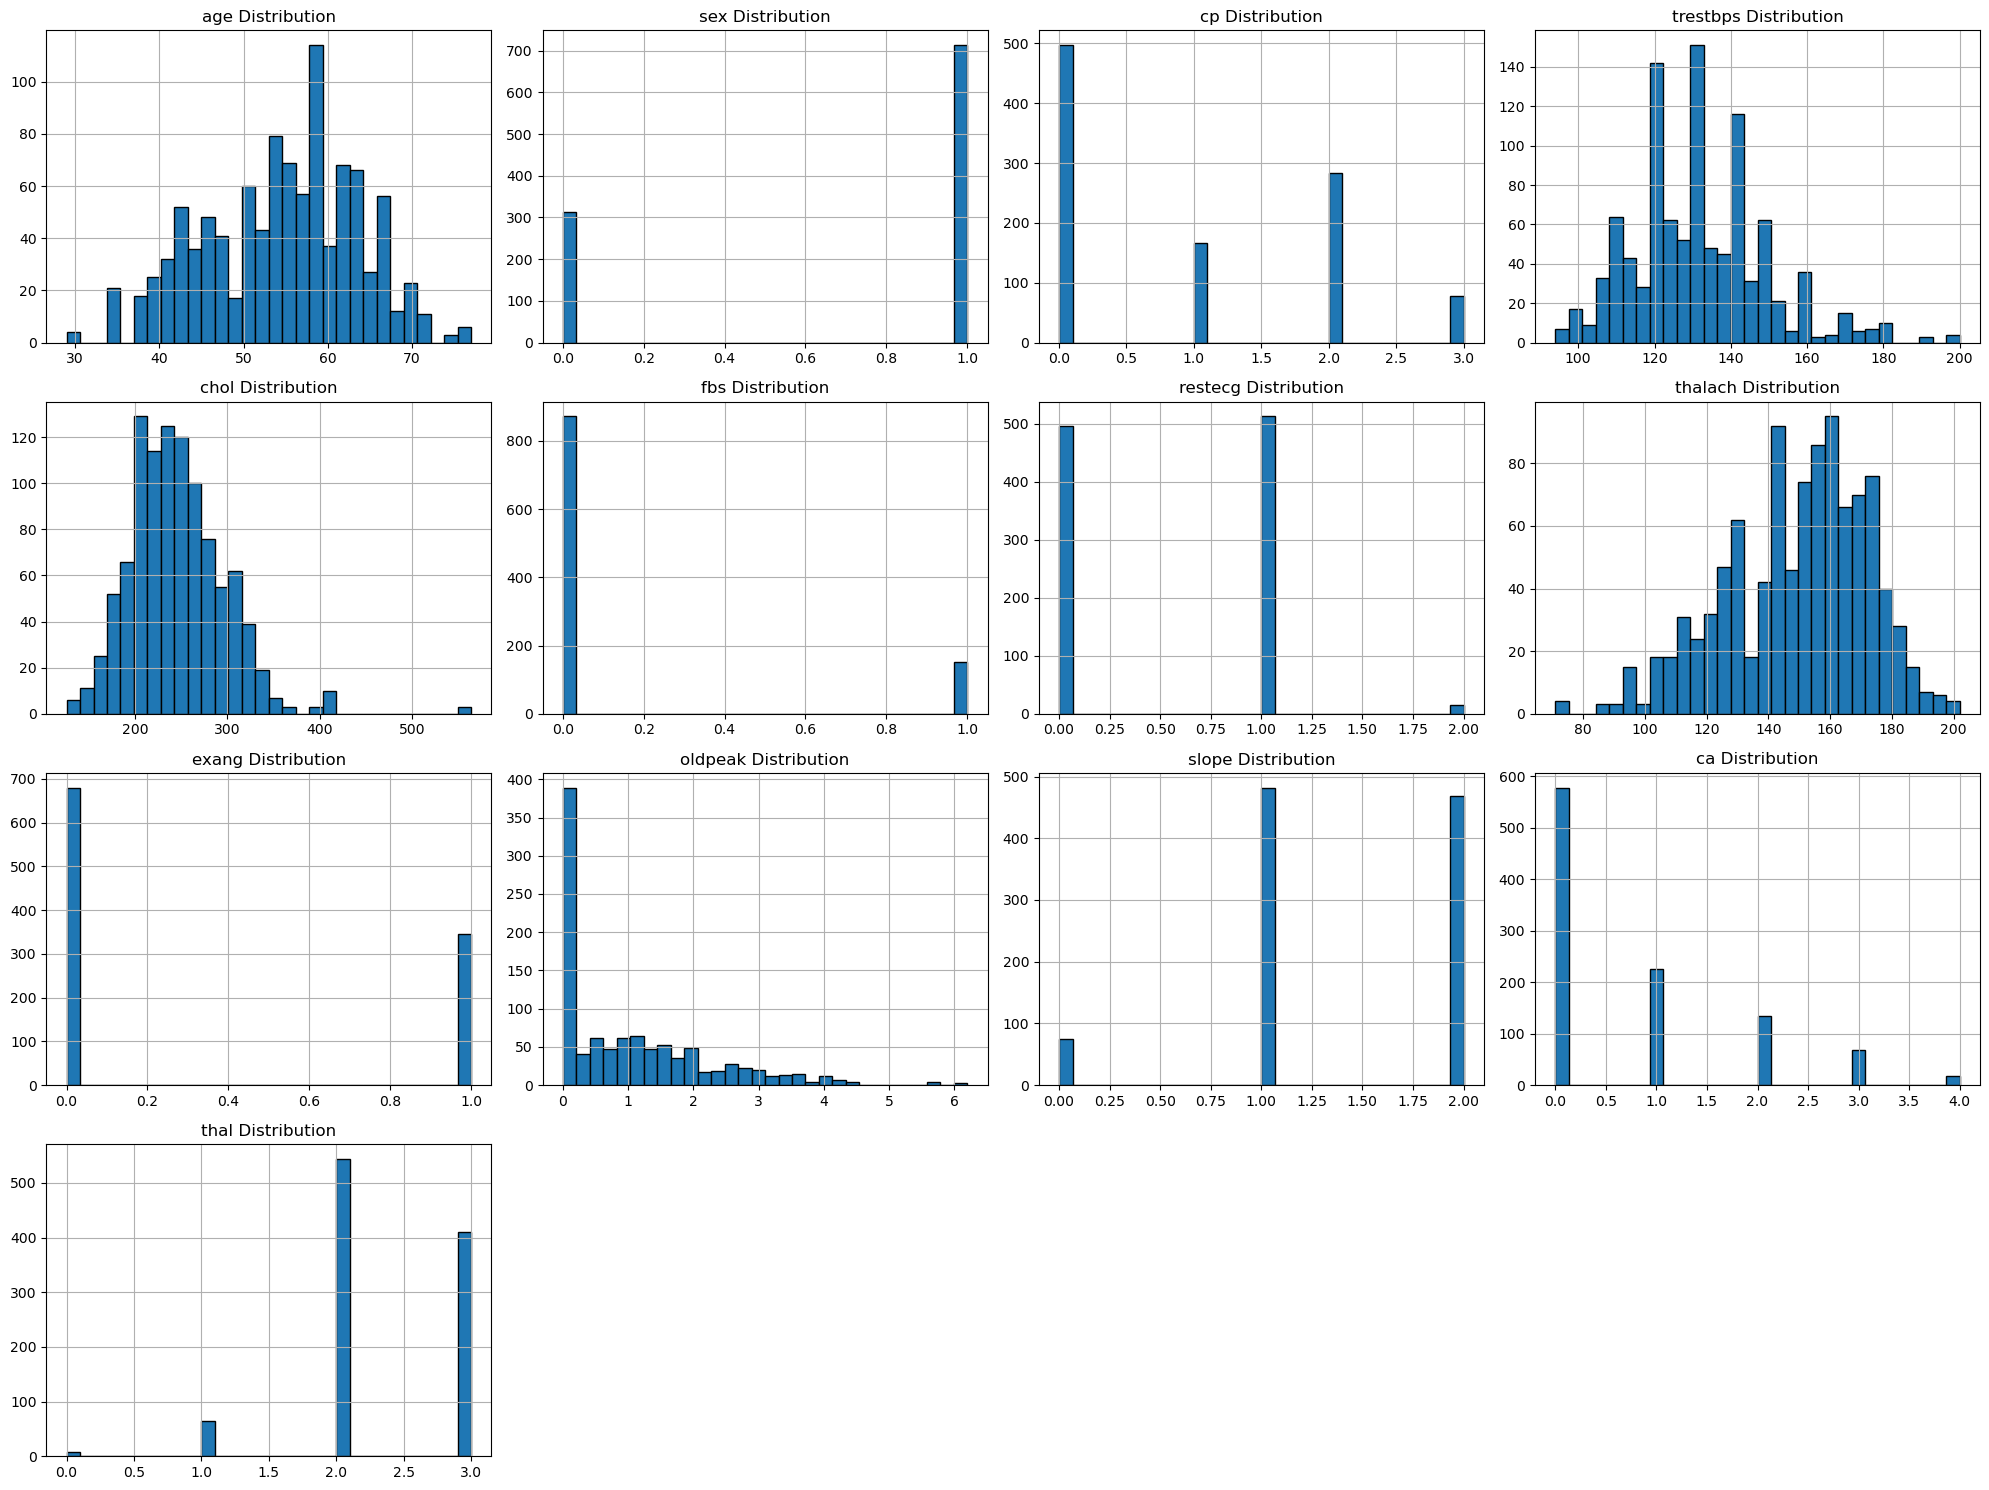

In [20]:
# Histograms of features
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(features):
    plt.subplot(4, 4, idx + 1)
    df[feature].hist(bins=30, edgecolor='black')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

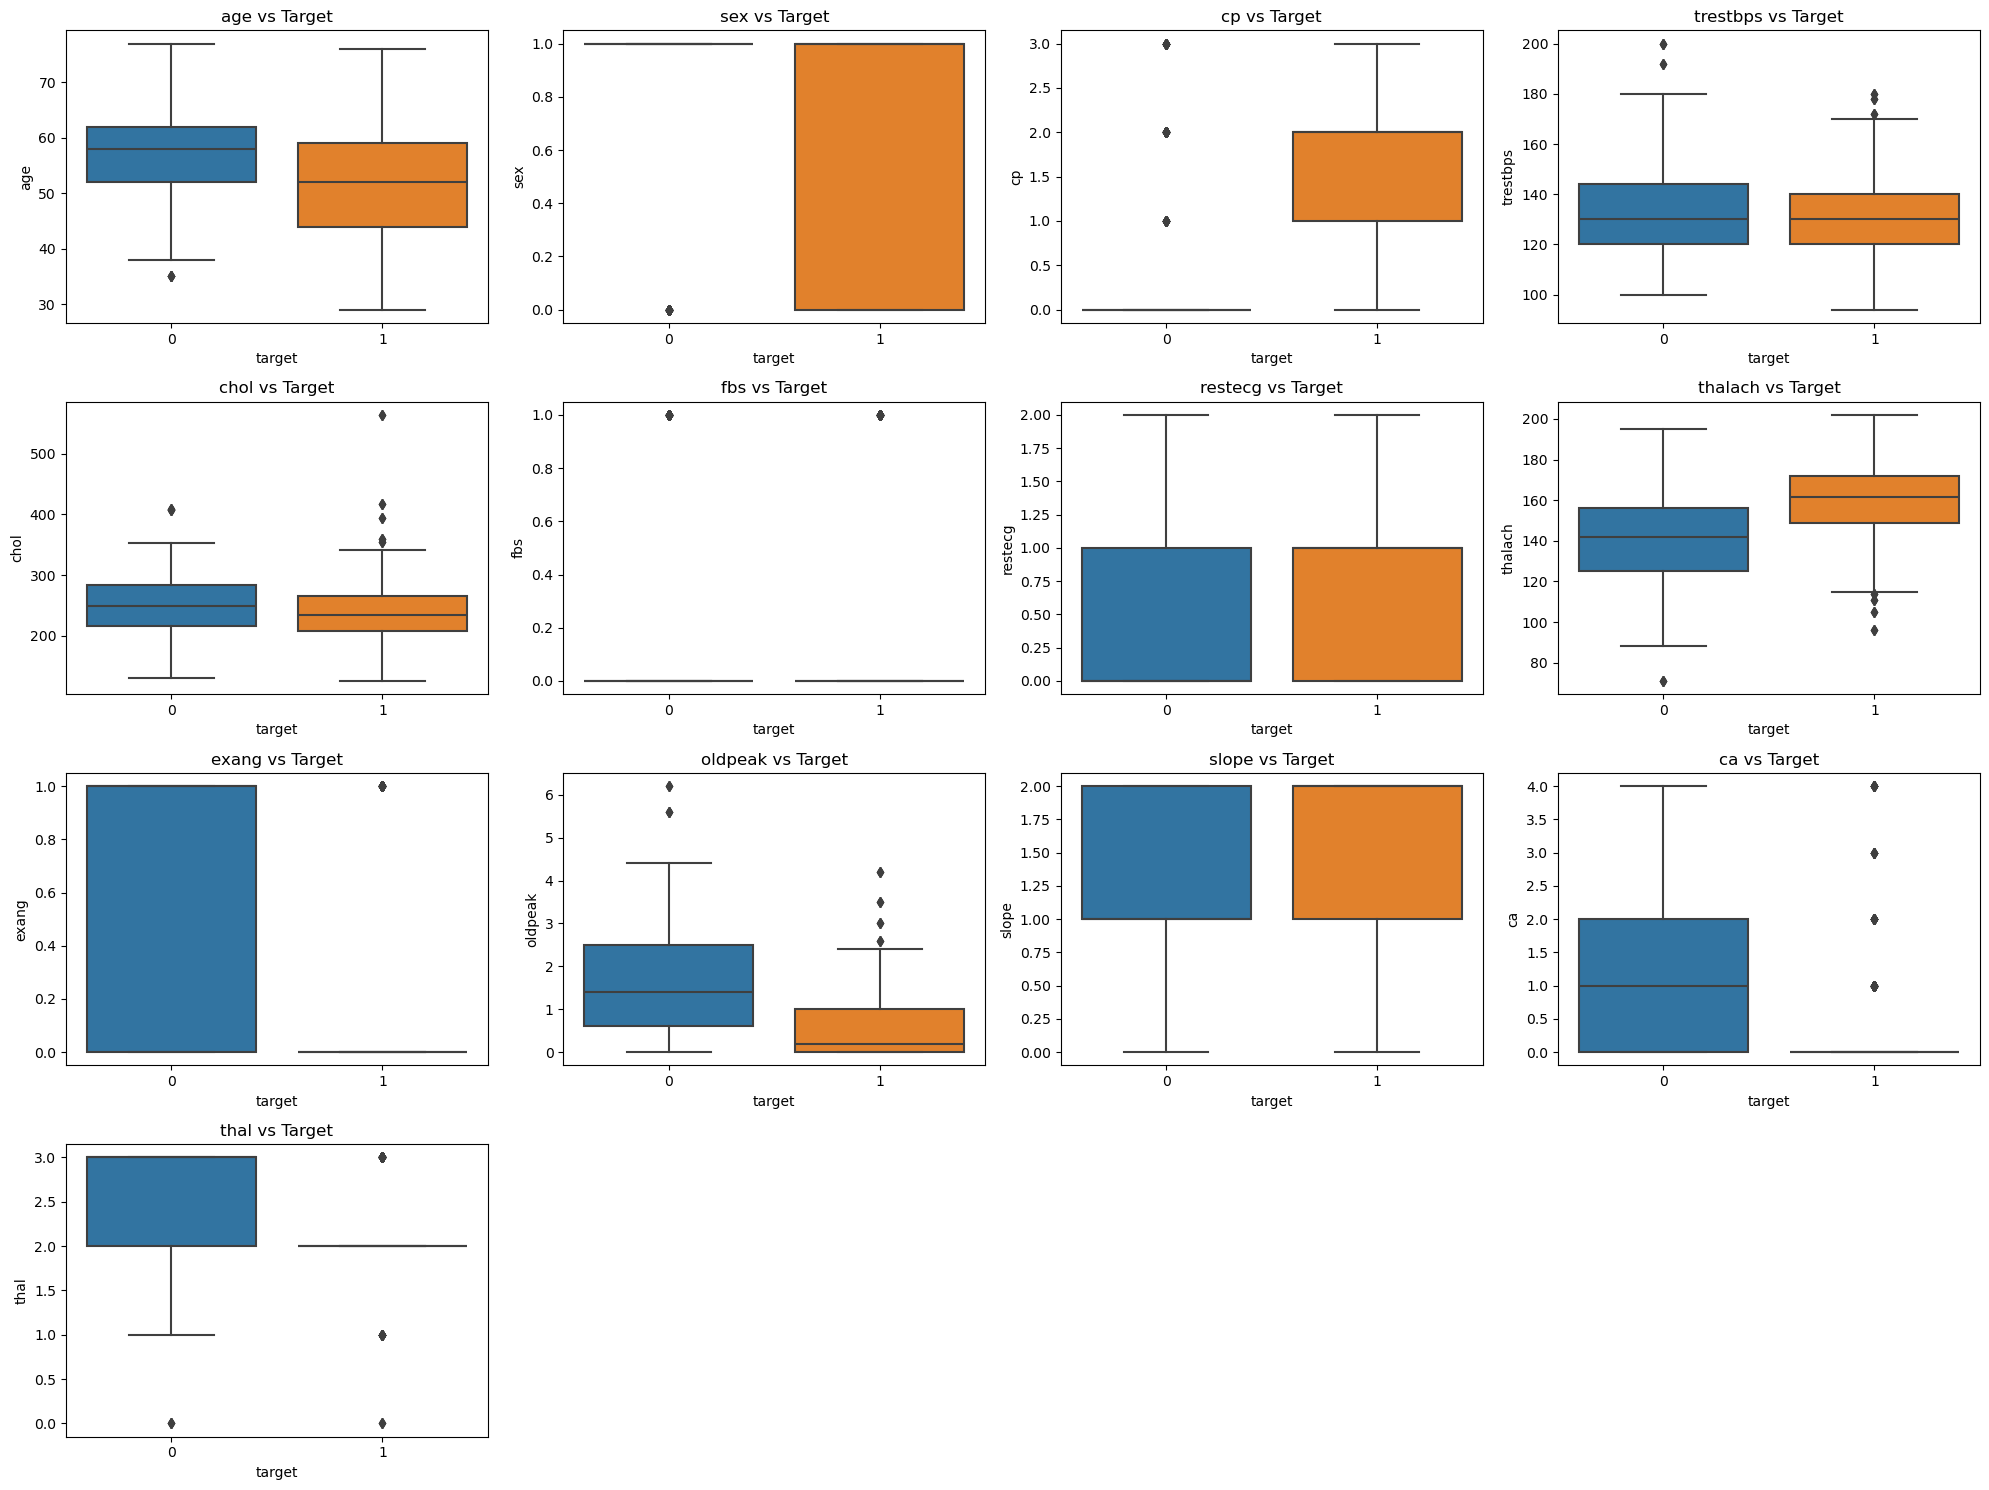

In [21]:
# Box plots of features against the target
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(features):
    plt.subplot(4, 4, idx + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

In [22]:
# Feature Engineering - Create new features
df_fe = df.copy()

In [23]:
# Grouping age into bins
age_bins = [29, 39, 49, 59, 69, 79]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df_fe['age_group'] = pd.cut(df_fe['age'], bins=age_bins, labels=age_labels, right=False)

In [24]:
# Interaction terms
df_fe['age_chol_interaction'] = df_fe['age'] * df_fe['chol']
df_fe['trestbps_thalach_interaction'] = df_fe['trestbps'] * df_fe['thalach']

In [25]:
# Polynomial features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_fe[numeric_features])
poly_feature_names = poly.get_feature_names_out(numeric_features)

In [26]:
# Dataframe for polynomial features
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

In [27]:
# Combine polynomial features with the main dataframe
df_fe = pd.concat([df_fe, df_poly], axis=1)

In [28]:
# Check for null values and data types
print(df_fe.isnull().sum())
df_fe.info()
print(df_fe.dtypes)

age                             0
sex                             0
cp                              0
trestbps                        0
chol                            0
fbs                             0
restecg                         0
thalach                         0
exang                           0
oldpeak                         0
slope                           0
ca                              0
thal                            0
target                          0
age_group                       0
age_chol_interaction            0
trestbps_thalach_interaction    0
age                             0
trestbps                        0
chol                            0
thalach                         0
oldpeak                         0
age^2                           0
age trestbps                    0
age chol                        0
age thalach                     0
age oldpeak                     0
trestbps^2                      0
trestbps chol                   0
trestbps thala

In [29]:
# One-hot encode age group
df_fe = pd.get_dummies(df_fe, columns=['age_group'], drop_first=True)

In [30]:
# Separate features and target
X = df_fe.drop(columns=['target'])
y = df['target']

In [31]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# PCA for dimensionality reduction
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components)

print(df_pca.head())

         0         1         2         3         4         5         6   \
0 -1.750449 -0.219267  0.866862 -0.399525 -1.175217  2.022237 -1.121030   
1  2.360306 -2.799528  3.831337 -0.374332 -0.236827  2.125647 -0.585680   
2  4.143378 -3.378964  0.154799 -3.818163 -0.887902 -0.363126  0.977312   
3 -0.738141  2.177128  0.052910 -3.438296 -0.230022 -0.505565 -1.991960   
4  4.465953 -1.154415 -2.358489  0.224231  1.211156 -1.039145  0.610572   

         7         8         9         10        11        12  
0 -0.723134  1.156455 -0.678996  0.586459  0.862946 -0.255092  
1  1.078816 -1.020496  1.356922  0.063522 -2.121099 -0.840528  
2  1.205952  4.072704  1.537380 -0.593718 -2.223781  0.034233  
3 -1.412549  0.787439 -0.600921  0.185735  0.066055 -0.054977  
4  0.570113 -1.412953 -1.786303  2.869406  0.605113 -0.870025  


In [33]:
# Random Forest model to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_scaled, y)
feature_importances = rf_model.feature_importances_